## Task_1

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# a ) Use Pandas to load both trainingSet.csv and testingSet.csv


In [5]:
train_dataset = 'C:/Users/Tushar/Desktop/Foundation of data science Assigment/trainingSet.csv'
test_dataset = 'C:/Users/Tushar/Desktop/Foundation of data science Assigment/testingSet.csv'
train_set = pd.read_csv(train_dataset)
test_set = pd.read_csv(test_dataset)

In [6]:
train_set.head(5)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1


# b) Find the number of patterns in each class for both loaded data sets using Python.

In [7]:
train_set.DEFECTIVE.unique()
train_set["DEFECTIVE"].value_counts()

 1    182
-1    182
Name: DEFECTIVE, dtype: int64

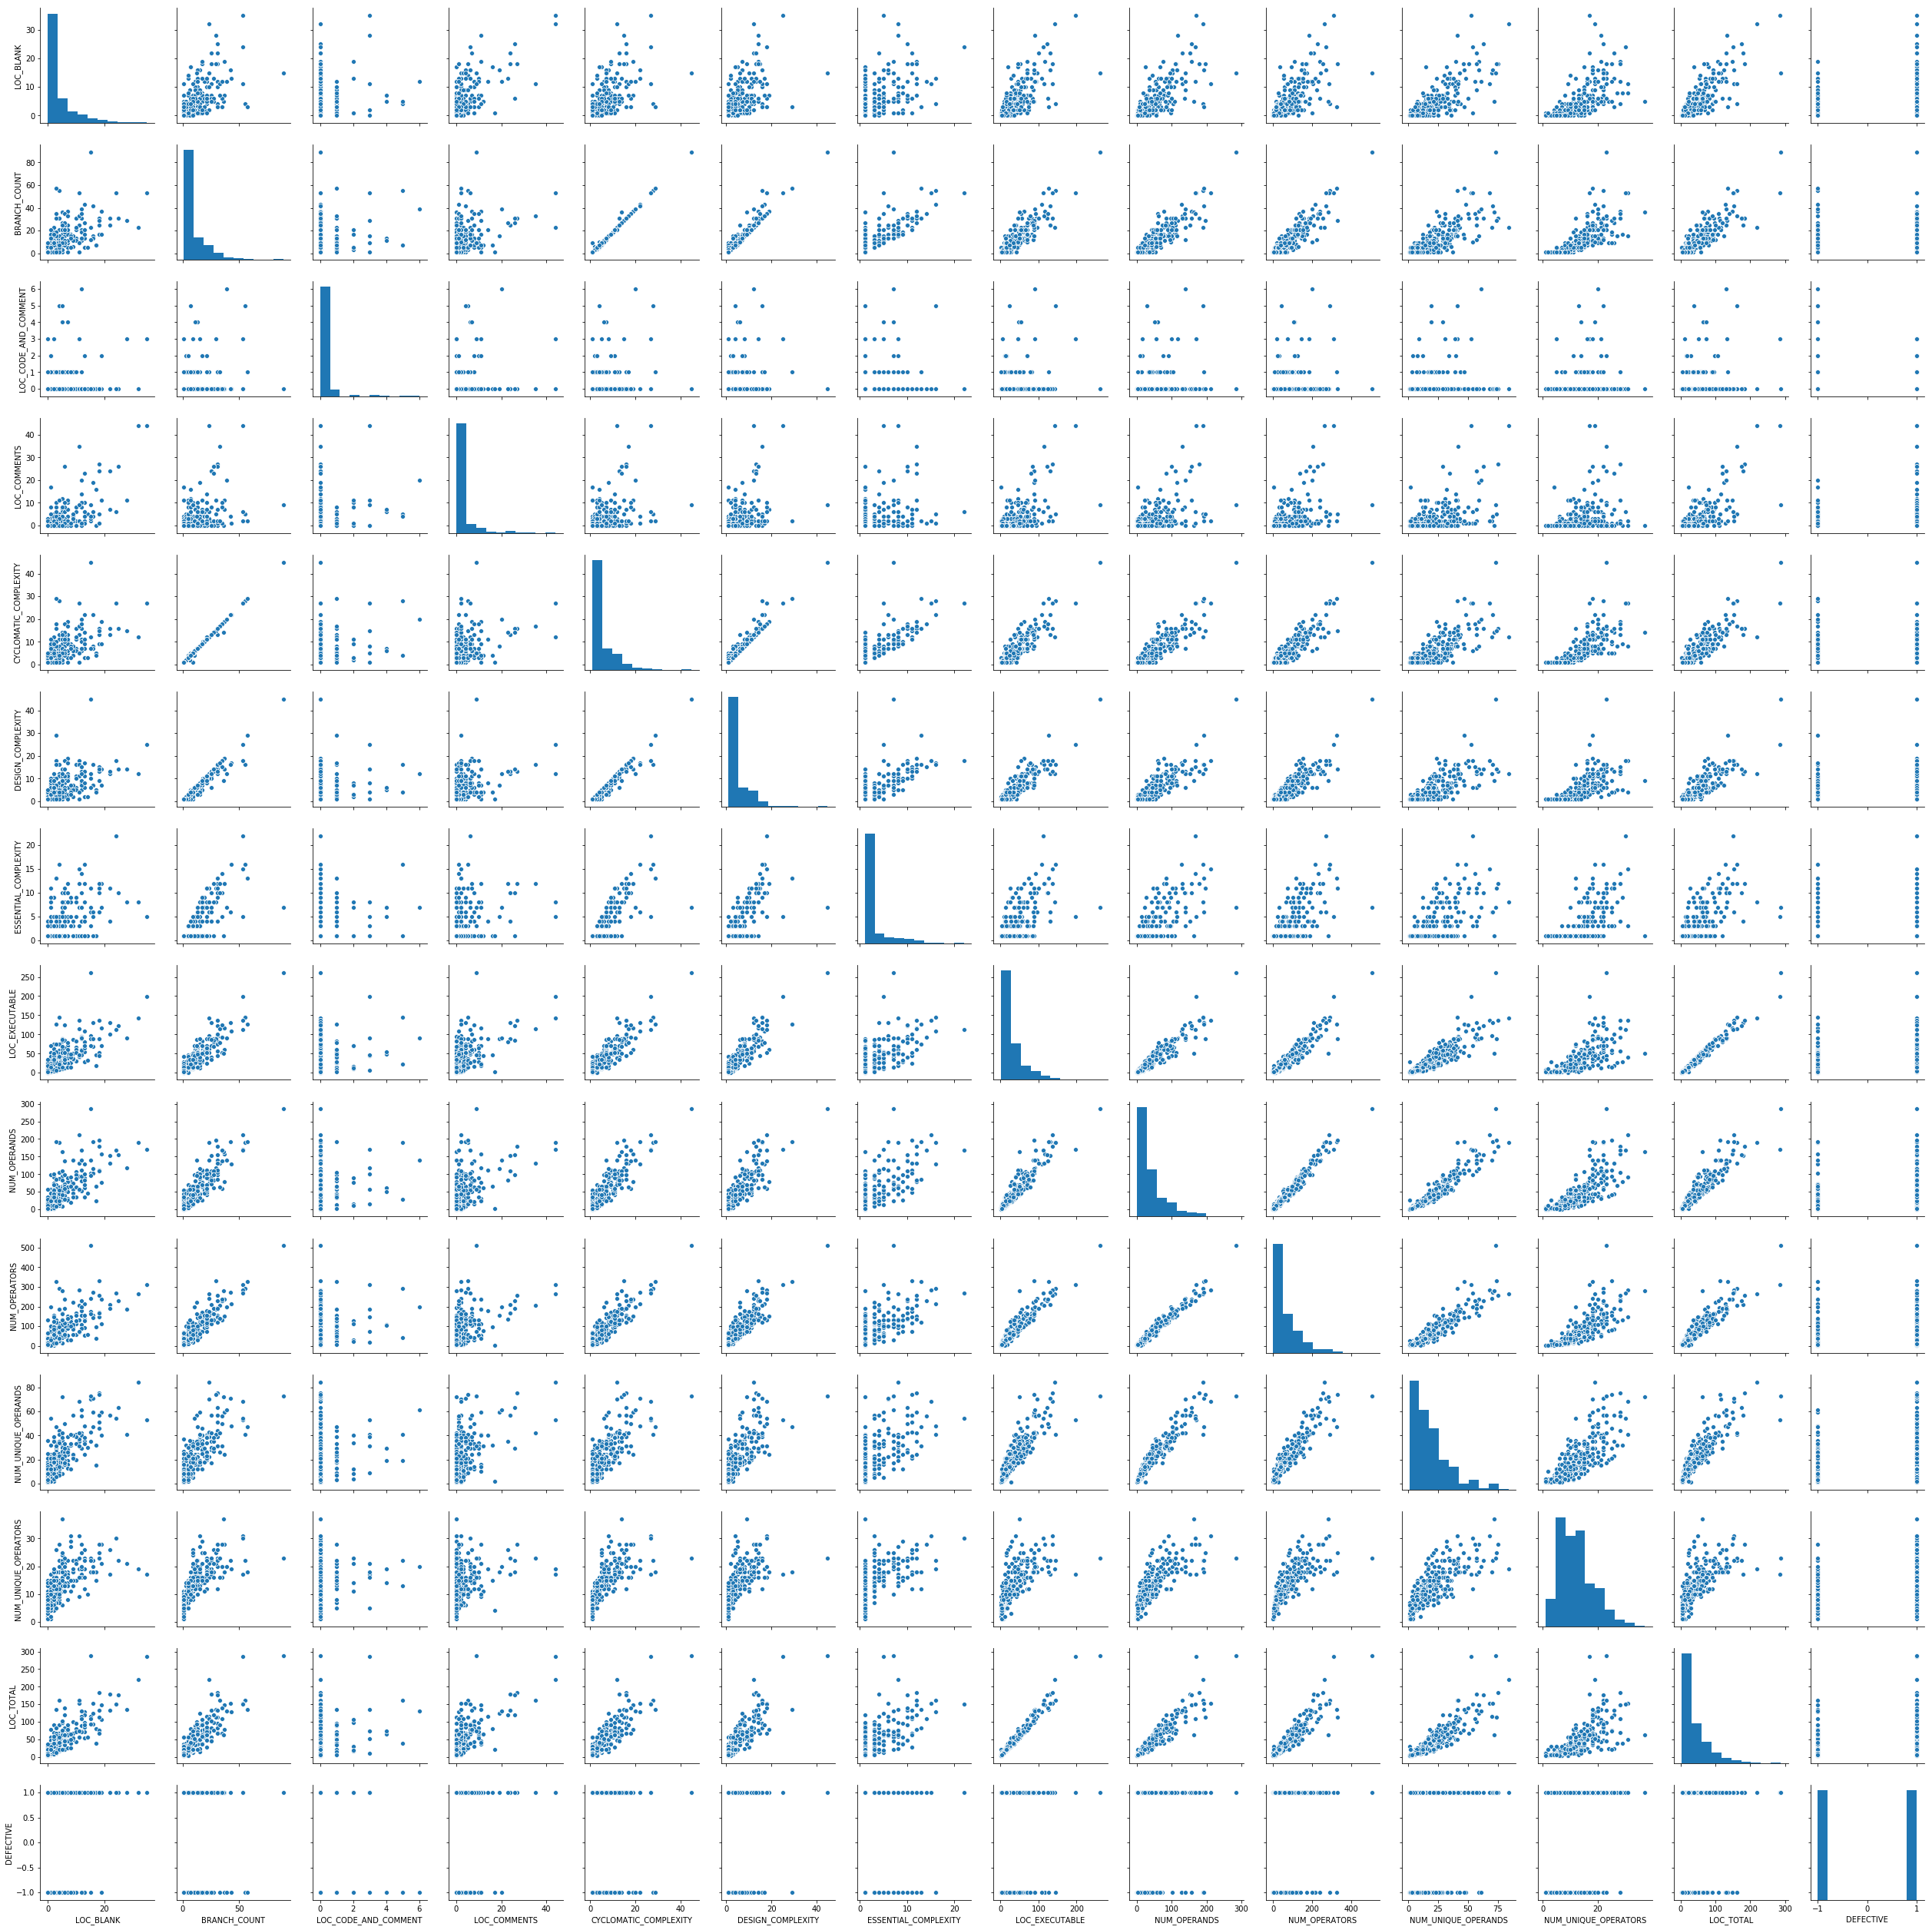

In [8]:
sns.pairplot(train_set)

In [9]:
train_set.columns

Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL',
       'DEFECTIVE'],
      dtype='object')

In [15]:
test_set.DEFECTIVE.unique()
test_set["DEFECTIVE"].value_counts()

 1    68
-1    68
Name: DEFECTIVE, dtype: int64

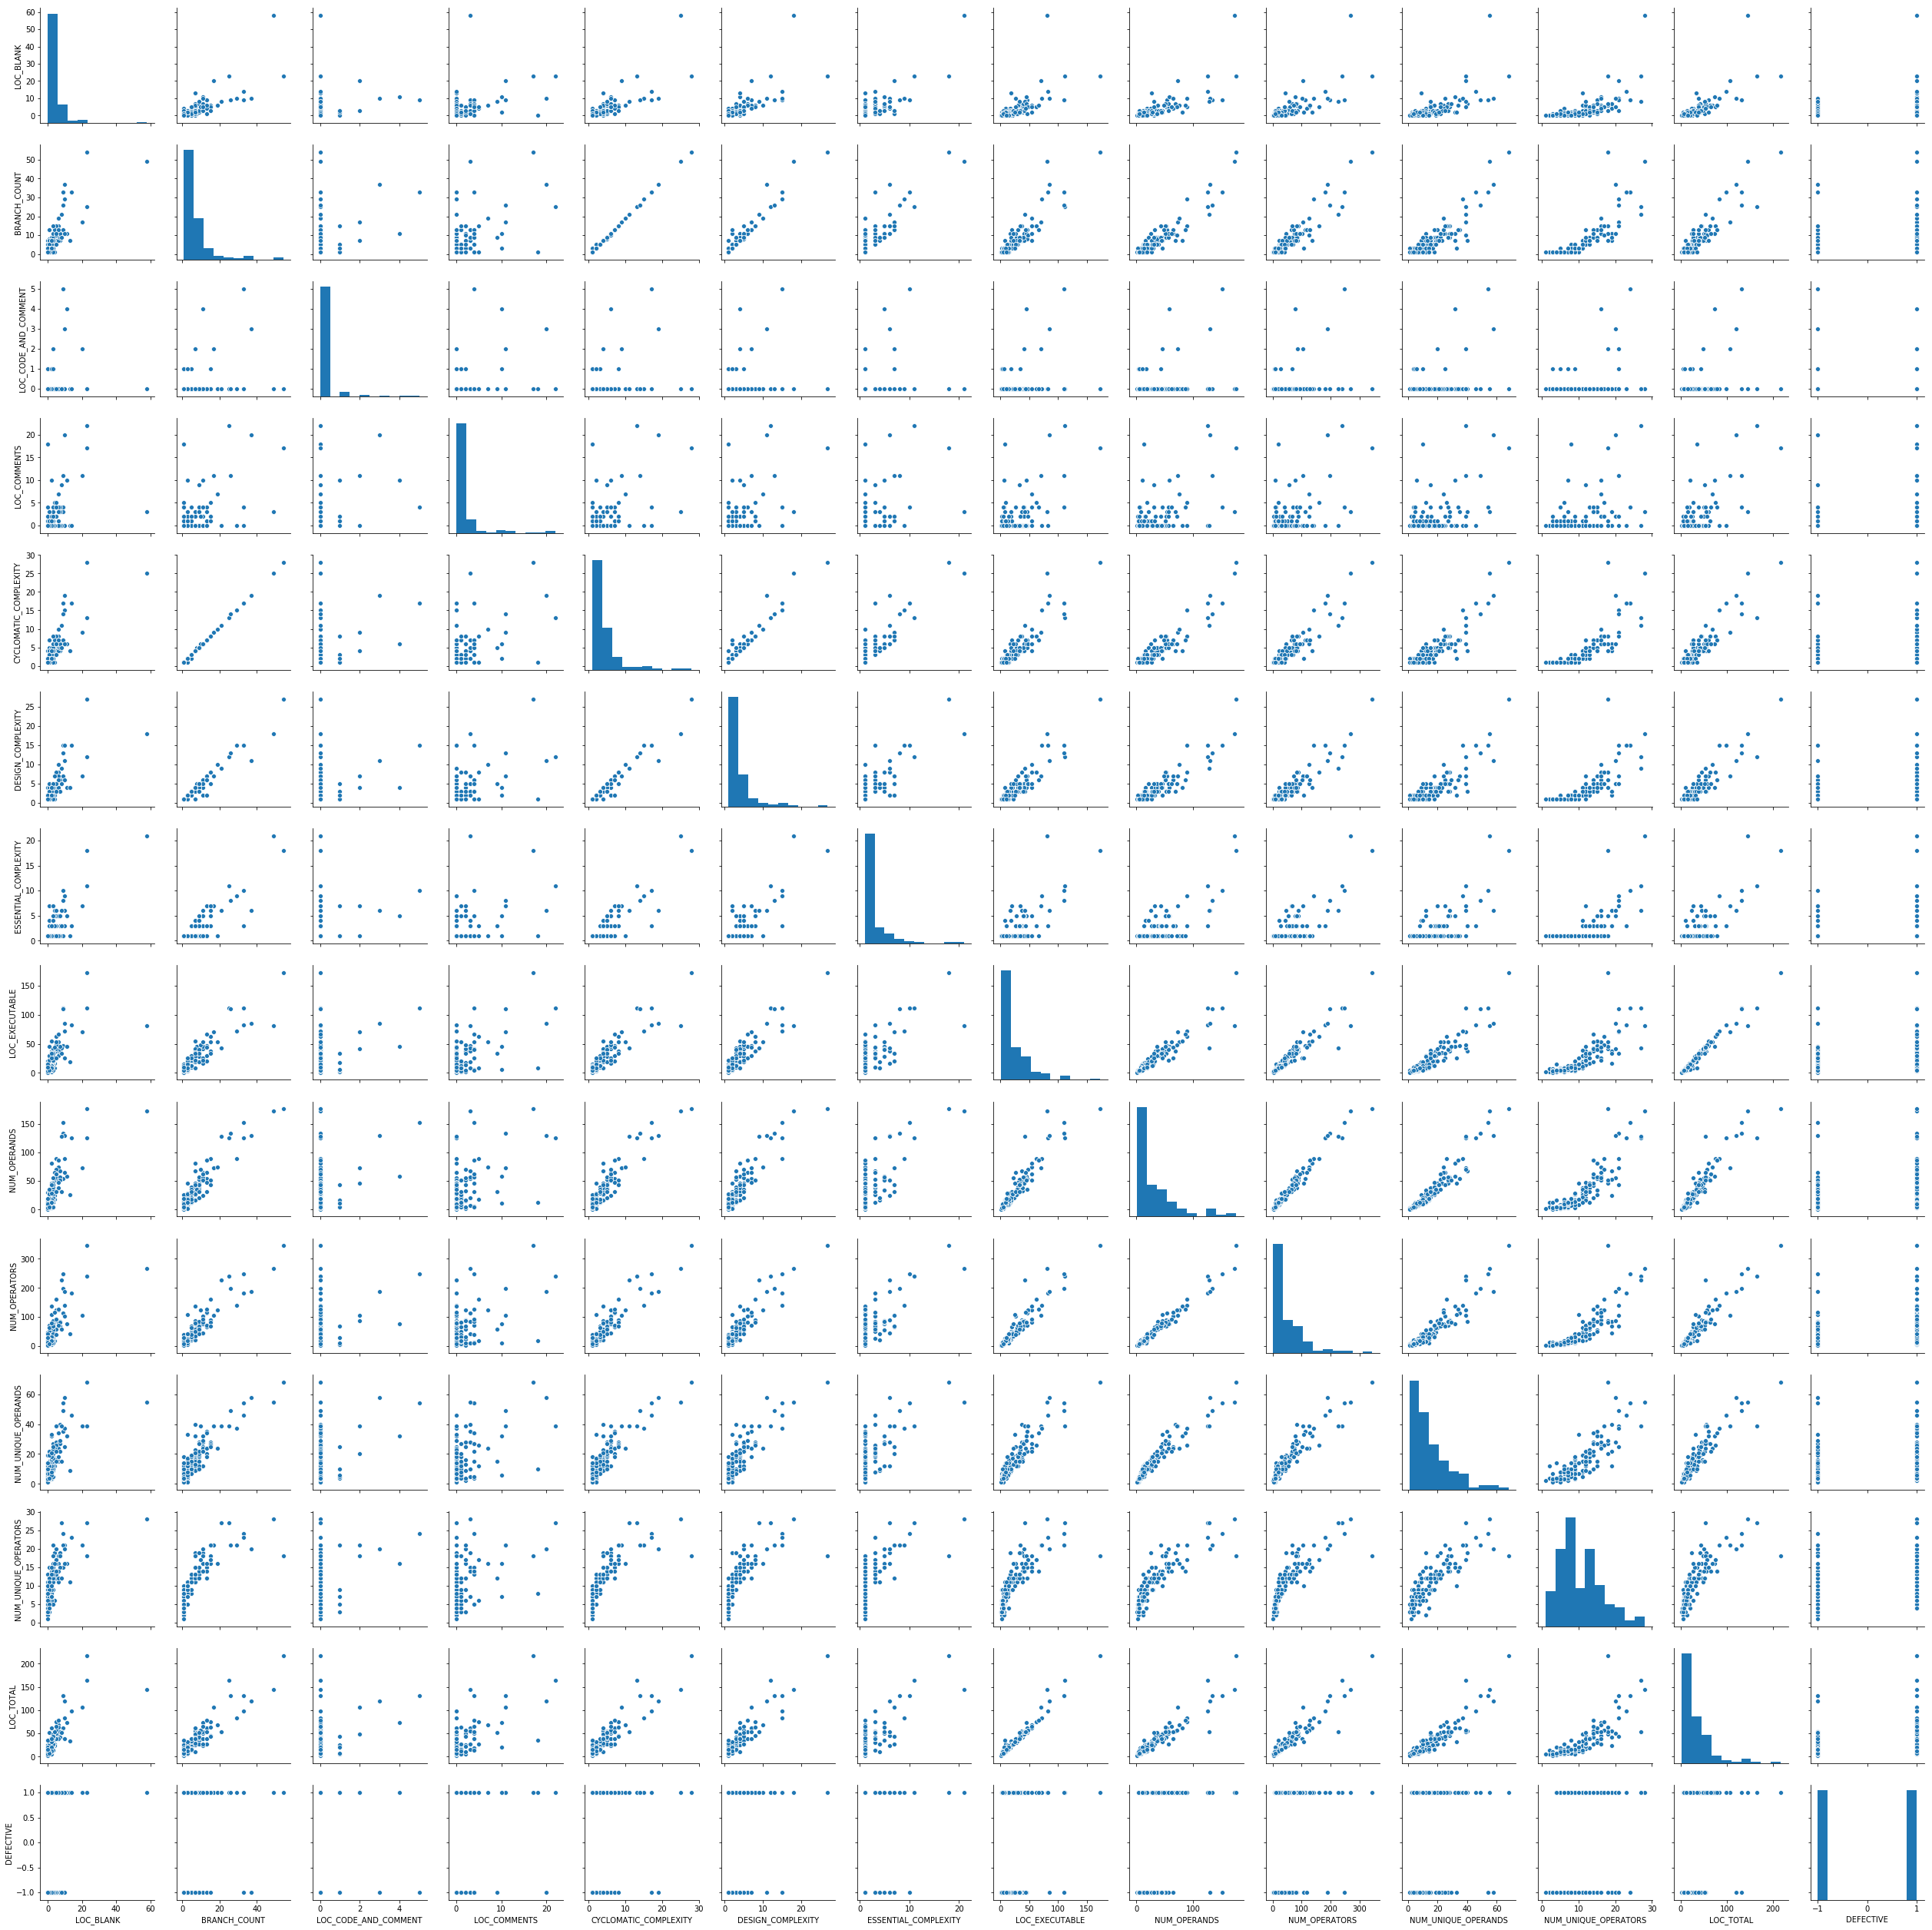

In [16]:
sns.pairplot(test_set)

In [10]:
features = ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL']
# Separating out the features
X = train_set.loc[:, features].values
# Separating out the target
Y = train_set.loc[:,['DEFECTIVE']].values
Y = np.resize(Y,(Y.shape[0]))

Y_test = test_set.loc[:,['DEFECTIVE']].values
Y_test = np.resize(Y_test,(Y_test.shape[0]))

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split( X, Y, test_size=0.55, random_state=42)
print("Orginal dataset shape: ",X.shape)
print("Train dataset shape: ",X_train.shape)
print("Validation dataset shape: ",X_val.shape)

Orginal dataset shape:  (364, 13)
Train dataset shape:  (163, 13)
Validation dataset shape:  (201, 13)


# c) Choose an attribute and generate a boxplot for the two classes in the training set.

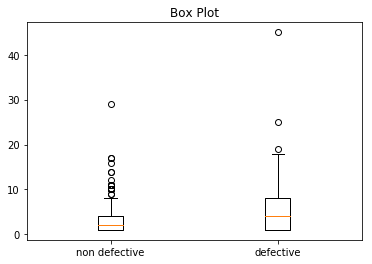

In [20]:
non_def = train_set[train_set['DEFECTIVE'] == -1]['DESIGN_COMPLEXITY'].tolist()
defc = train_set[train_set['DEFECTIVE'] == 1]['DESIGN_COMPLEXITY'].tolist()

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot([non_def,defc], labels=['non defective','defective'])
plt.show()

DEFECTIVE
-1    [1, 2, 8, 6, 3, 7, 4, 11, 14, 5, 10, 9, 17, 16...
 1    [1, 4, 8, 2, 3, 13, 11, 12, 5, 10, 6, 7, 16, 2...
Name: DESIGN_COMPLEXITY, dtype: object
[array([ 1,  2,  8,  6,  3,  7,  4, 11, 14,  5, 10,  9, 17, 16, 29, 12],
      dtype=int64), array([ 1,  4,  8,  2,  3, 13, 11, 12,  5, 10,  6,  7, 16, 25, 19, 14,  9,
       15, 18, 45], dtype=int64)]


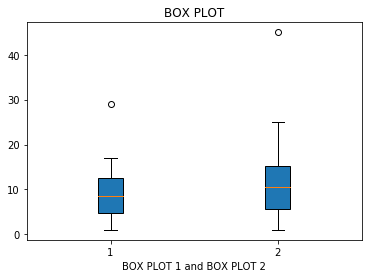

In [50]:
group = train_set['DESIGN_COMPLEXITY'].groupby(train_set['DEFECTIVE']).unique()
class1, class2 = (group)
data=[class1,class2]
plt.boxplot(data, patch_artist=True) #for Blue color
plt.title('BOX PLOT')
plt.xlabel("BOX PLOT 1 and BOX PLOT 2")
print(group)
print(data)

# d) Show one scatter plot, that is, one feature against another feature. It is your choice to show which two features you want to use. You need to use the training set.

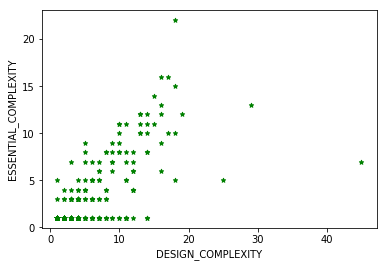

In [21]:
train_set.plot(kind = 'scatter', x = 'DESIGN_COMPLEXITY', y = 'ESSENTIAL_COMPLEXITY', c=['green'], marker='*')

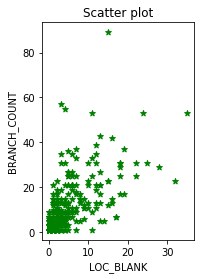

In [52]:
fig = plt.figure()

x = [train_set.LOC_BLANK]
y = [train_set.BRANCH_COUNT]


plt.subplot(1, 2, 1)
plt.scatter(x,y, c='green', marker='*')


plt.title('Scatter plot')
plt.xlabel('LOC_BLANK')
plt.ylabel('BRANCH_COUNT')
plt.show()

# e) Divide the original training set into a smaller training set (II) and a validation set. In this task,you need to use 55% of total training data points as the validation set

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_val = train_test_split(train_set,test_size=0.45,random_state=1)
print('shape of training set is : ',x_train.shape)
print('shape of validation set is : ',x_val.shape)

shape of training set is :  (200, 14)
shape of validation set is :  (164, 14)


## Task_2

# a) Perform a PCA analysis on the original training data set.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
stdScaler = StandardScaler()
X_std = stdScaler.fit_transform(X)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X_std)
X_new = pd.DataFrame(data=principalComponents)
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.545231,0.023622,-0.033023,0.488183,0.055257,-0.434216,-0.141851,0.116486,0.122513,0.050841,0.000047,-0.002229,-0.024899
1,-2.546383,0.138904,-0.132552,0.422284,-0.135328,-0.501633,0.178080,0.123340,0.088469,-0.006532,0.016212,0.006791,-0.024100
2,-1.197935,0.250131,-0.422307,-0.072543,0.006851,0.176730,-0.012282,-0.199549,0.134696,-0.270182,-0.135437,0.476967,-0.085736
3,-2.989879,0.083059,0.047921,0.821137,-0.160468,-0.437341,0.075954,0.157861,0.168380,0.037778,-0.006353,0.006537,-0.002924
4,-2.368161,-0.050425,-0.015071,0.078091,-0.014037,-0.021988,-0.133822,-0.039287,0.003025,0.002549,0.025062,0.007907,0.032179


# b) Plot a scree plot to report variances captured by each principal component.

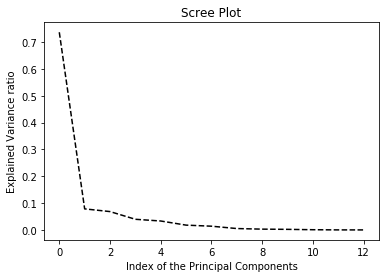

In [26]:
fig =plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_ratio_, color='black' , linestyle='dashed')
plt.title('Scree Plot')
plt.xlabel('Index of the Principal Components')
plt.ylabel('Explained Variance ratio')
plt.show()

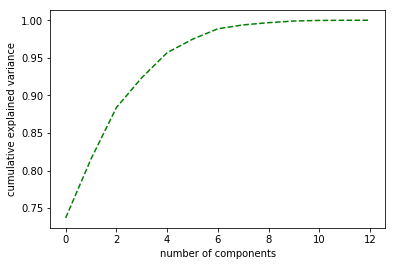

In [29]:
fig2 = plt.figure()
ax2 = plt.gca()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='green' , linestyle='dashed'  )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# c) Project the test set on the same PCA space produced by the original training dataset.

In [32]:
X_test = test_set.loc[:, features].values
X_test_std = stdScaler.transform(X_test)
X_Test_new = pd.DataFrame(data=pca.transform(X_test_std))
X_Test_new.head()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.255165,-0.167840,-0.089839,-0.197572,0.238231,0.267669,-0.168413,-0.076073,0.179265,0.003599,0.002115,-0.011752,0.017754
1,-2.369957,0.015186,-0.071113,0.267674,0.065745,-0.287122,-0.174374,-0.018283,-0.082429,-0.086677,0.003766,0.012317,0.042657
2,-1.024353,-0.409781,0.081884,0.010858,0.480197,0.147186,-0.200497,0.146401,-0.209173,-0.101797,0.025569,-0.008991,0.010535
3,-2.890776,0.081963,0.010479,0.755144,-0.091975,-0.510904,-0.006535,0.214697,0.100419,-0.011320,0.004816,0.004492,-0.006484
4,-2.697599,-0.009491,0.048121,0.379664,-0.142613,-0.083843,0.016074,0.002515,0.106659,0.041950,0.022278,0.003416,-0.019069


# d) Plot two subplots in one figure: one for the training data in the PC1 and PC2 projection space and label the data in the picture according to its class; the other one for the test data in the same PCA space and label the data in the picture according to its class.


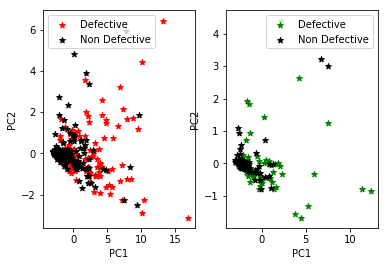

In [36]:
fig2, axes = plt.subplots(ncols = 2)
defct = X_new[train_set['DEFECTIVE'] == 1]
non_defct = X_new[train_set['DEFECTIVE'] == -1]

defct_2 = X_Test_new[test_set['DEFECTIVE'] == 1]
non_defct_2 = X_Test_new[test_set['DEFECTIVE'] == -1]

axes[0].scatter(defct.loc[:,:0].values,defct.loc[:,1:1].values, facecolor='red', label='Defective', marker = '*')
axes[0].scatter(non_defct.loc[:,:0].values,non_defct.loc[:,1:1].values, facecolor='black', label='Non Defective', marker = '*')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
#axes[0].label = ['df','df']

axes[1].scatter(defct_2.loc[:,:0].values,defct_2.loc[:,1:1].values, facecolor='green', label='Defective', marker='*')
axes[1].scatter(non_defct_2.loc[:,:0].values,non_defct_2.loc[:,1:1].values, facecolor='black', label='Non Defective', marker='*')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()
plt.show()

## Task_3

# Train the model using the original training set and report the performance on the test set including accuracy rate. 

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [53]:
gnb = GaussianNB()
y_pred = gnb.fit(X, Y).predict(X_test)

In [40]:
xtrain = train_set.drop('DEFECTIVE', axis=1)
ytrain = train_set.loc[:,'DEFECTIVE']
xtest = test_set.drop('DEFECTIVE', axis=1)
ytest = test_set.loc[:,'DEFECTIVE']

gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

pred = gnb.predict(xtest)

print('Accuracy : ' ,metrics.accuracy_score(ytest, pred))

Accuracy :  0.6176470588235294


## Task_4

# a) Use the training set (II) to train 13 Naïve Bayes Classification models, with 13 different feature sets. That is: the first one is to use the 1st feature only; the second one is to use the 1st and the 2nd features; the third one is to use the 1st, 2nd, and 3rd features, the fourth one is to use the first 4 features, and so on.Measure the accuracy rate on both the training set and the validation set. Report the results by plotting them in a figure: that is, a plot of the accuracy rate against the number of features used in each model. There should be two curves in this figure: one for the training set (II); the other one for the validation set

In [41]:
X_train_new = stdScaler.transform(X_train)
X_train_new = pca.transform(X_train_new)
X_train_new = pd.DataFrame(data=X_train_new)
X_val_new = stdScaler.transform(X_val)
X_val_new = pca.transform(X_val_new)
X_val_new = pd.DataFrame(data=X_val_new)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
print('Shape of new X_train',X_train_new.shape)
print('Shape of new X_val',X_val_new.shape)
Y_train = np.resize(Y_train,(Y_train.shape[0]))
Y_val = np.resize(Y_val,(Y_val.shape[0]))

Shape of new X_train (163, 13)
Shape of new X_val (201, 13)


In [43]:
number_of_pcs_list = []
training_score_list = []
validation_score_list = []
for i in range(13):
    number_of_pcs_list.append(i+1)
    gnb = GaussianNB()
    model = gnb.fit(X_train_new.loc[:,:i], Y_train)
    print('Model with ', i+1,' PCs')
    y_pred_trainingset = model.predict(X_train_new.loc[:,:i])
    #training_score = ((Y_train == y_pred_trainingset).sum())/X_train_new.shape[0]
    training_score = metrics.accuracy_score(Y_train, y_pred_trainingset)
    training_score_list.append(training_score)
    print("Accuracy of the trained model with ",i+1," PC on trainig set is ", training_score)
    y_pred = model.predict(X_val_new.loc[:,:i])
    #validation_score = ((Y_val == y_pred).sum())/X_val_new.shape[0]
    validation_score = metrics.accuracy_score(Y_val, y_pred)
    validation_score_list.append(validation_score)
    print("Accuracy of the trained model with ",i+1," PC on validation set is ", validation_score)
    print('Avg score = ', (training_score+validation_score)/2)
    print('')

Model with  1  PCs
Accuracy of the trained model with  1  PC on trainig set is  0.6196319018404908
Accuracy of the trained model with  1  PC on validation set is  0.6019900497512438
Avg score =  0.6108109757958673

Model with  2  PCs
Accuracy of the trained model with  2  PC on trainig set is  0.588957055214724
Accuracy of the trained model with  2  PC on validation set is  0.582089552238806
Avg score =  0.585523303726765

Model with  3  PCs
Accuracy of the trained model with  3  PC on trainig set is  0.6196319018404908
Accuracy of the trained model with  3  PC on validation set is  0.5870646766169154
Avg score =  0.6033482892287031

Model with  4  PCs
Accuracy of the trained model with  4  PC on trainig set is  0.6196319018404908
Accuracy of the trained model with  4  PC on validation set is  0.6119402985074627
Avg score =  0.6157861001739767

Model with  5  PCs
Accuracy of the trained model with  5  PC on trainig set is  0.6196319018404908
Accuracy of the trained model with  5  PC on

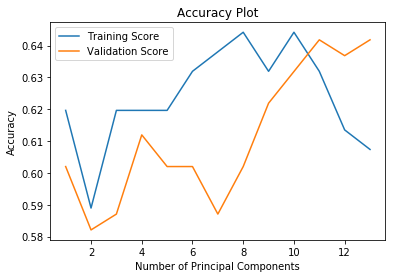

In [44]:
plt.figure()
plt.plot(number_of_pcs_list, training_score_list, label = "Training Score")
plt.plot(number_of_pcs_list, validation_score_list, label = "Validation Score")
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# b)Report what is the best number of features you would like to use in this work and explain why you choose it. Write it down in your Jupyter notebook.

# c) Use the selected number of features to train the model and report the performance on the test set.


In [45]:
    
number_of_PCs = 11
number_of_PCs = number_of_PCs - 1
gnb = GaussianNB()
final_model = gnb.fit(X_new.loc[:,:number_of_PCs], Y)
y_pred = final_model.predict(X_Test_new.loc[:,:number_of_PCs])
print("Accuracy of the final trained model is ",metrics.accuracy_score(Y_test, y_pred))

Accuracy of the final trained model is  0.6176470588235294


In [46]:
for i in range(13):
    print(i+1)
    gnb = GaussianNB()
    final_model = gnb.fit(X_new.loc[:,:i], Y)
    y_pred = final_model.predict(X_Test_new.loc[:,:i])
    print("Accuracy of the final trained model is ",((Y_test == y_pred).sum())/X_Test_new.shape[0])
    print('')

1
Accuracy of the final trained model is  0.5955882352941176

2
Accuracy of the final trained model is  0.5882352941176471

3
Accuracy of the final trained model is  0.6102941176470589

4
Accuracy of the final trained model is  0.6029411764705882

5
Accuracy of the final trained model is  0.625

6
Accuracy of the final trained model is  0.6176470588235294

7
Accuracy of the final trained model is  0.6102941176470589

8
Accuracy of the final trained model is  0.6176470588235294

9
Accuracy of the final trained model is  0.625

10
Accuracy of the final trained model is  0.6176470588235294

11
Accuracy of the final trained model is  0.6176470588235294

12
Accuracy of the final trained model is  0.625

13
Accuracy of the final trained model is  0.625



## Task_5

# Summarize your findings